<a href="https://colab.research.google.com/github/CharlesCoster/ada-project-terrorism-impact/blob/master/part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [129]:
terror_df = pd.read_csv('final_terrorism.csv',low_memory=False)
terror_df.head()

,eventid,iyear,imonth,iday,country_txt,city,region_txt,attacktype1_txt,attacktype2_txt,attacktype3_txt,targtype1_txt,targtype2_txt,weaptype1_txt,weaptype2_txt,weaptype3_txt,weaptype4_txt,gname,nkill,nkillter
0,197000000001,1970,7,2,Dominican Republic,Santo Domingo,Central America & Caribbean,Assassination,NaN,NaN,Private Citizens & Property,NaN,Unknown,NaN,NaN,NaN,MANO-D,1.0,NaN
1,197000000002,1970,0,0,Mexico,Mexico city,North America,Hostage Taking (Kidnapping),NaN,NaN,Government (Diplomatic),NaN,Unknown,NaN,NaN,NaN,23rd of September Communist League,0.0,NaN
2,197001000001,1970,1,0,Philippines,Unknown,Southeast Asia,Assassination,NaN,NaN,Journalists & Media,NaN,Unknown,NaN,NaN,NaN,Unknown,1.0,NaN
3,197001000002,1970,1,0,Greece,Athens,Western Europe,Bombing/Explosion,NaN,NaN,Government (Diplomatic),NaN,Explosives,NaN,NaN,NaN,Unknown,NaN,NaN
4,197001000003,1970,1,0,Japan,Fukouka,East Asia,Facility/Infrastructure Attack,NaN,NaN,Government (Diplomatic),NaN,Incendiary,NaN,NaN,NaN,Unknown,NaN,NaN


In [0]:
def normalize(d, target=1.0):
  raw = sum(d.values())
  if raw != 0:
    factor = target/raw
  else: 
    factor = 0
  return {key:value*factor for key,value in d.items()}

In this part, we are trying to analyse the evolution of terrorism since 1970 :
- regions with the highest number of attaks per year
- weapon's type per year and region
- terrorist group across years

## Region terrorism across year

In [173]:
dict_region = {}
for year, group in terror_df.groupby('iyear'):
    dict_region[year] = {}
    for txt in ['region_txt']:
      regions = group[txt].value_counts().to_dict()
      # Keep region with the highest number of attacks on current year
      dict_region[year] = max(regions, key=regions.get)

dict_region

{1970: 'North America',
 1971: 'North America',
 1972: 'Western Europe',
 1973: 'Western Europe',
 1974: 'Western Europe',
 1975: 'Western Europe',
 1976: 'Western Europe',
 1977: 'Western Europe',
 1978: 'Western Europe',
 1979: 'Western Europe',
 1980: 'Central America & Caribbean',
 1981: 'Central America & Caribbean',
 1982: 'Central America & Caribbean',
 1983: 'South America',
 1984: 'South America',
 1985: 'South America',
 1986: 'South America',
 1987: 'South America',
 1988: 'South America',
 1989: 'South America',
 1990: 'South America',
 1991: 'South America',
 1992: 'South America',
 1994: 'Middle East & North Africa',
 1995: 'South Asia',
 1996: 'South Asia',
 1997: 'South America',
 1998: 'Middle East & North Africa',
 1999: 'Middle East & North Africa',
 2000: 'South Asia',
 2001: 'South Asia',
 2002: 'South Asia',
 2003: 'South Asia',
 2004: 'Middle East & North Africa',
 2005: 'Middle East & North Africa',
 2006: 'Middle East & North Africa',
 2007: 'Middle East & Nort

As we can see, terrorism evolves a lot. In the following, we are focusing on different parts of the world:
- South Asia
- Middle East & North Africa
- South America
- Western Europe
- North America

### Number of attacks

In [0]:
regions = {}

for year, group in terror_df.groupby('iyear'):
    dict_region[year] = {}
    for txt in ['region_txt']:
      regions[year] = group[txt].value_counts().to_dict()

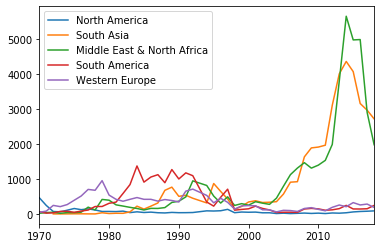

In [220]:
regions_df = pd.DataFrame(regions).transpose()
regions_df[['North America','South Asia', 'Middle East & North Africa', 'South America','Western Europe']].plot(legend=True)
plt.show()

## Weapons

### North America

In [0]:
df = terror_df[terror_df.region_txt.isin(['North America'])]

In [0]:
dict_weapons = {}
for year, group in df.groupby('iyear'):
    dict_weapons[year] = {}
    for txt in ['weaptype1_txt','weaptype2_txt','weaptype3_txt']:
      weapons = group[txt].value_counts().to_dict()
      for weapon in weapons.keys():
        if weapon not in ['Unknown','Other'] and weapon in dict_weapons:
          dict_weapons[year][weapon] += weapons[weapon]
        elif weapon not in ['Unknown','Other']:
          dict_weapons[year][weapon] = weapons[weapon]

In [213]:
for k in dict_weapons.keys():
  dict_weapons[k] = normalize(dict_weapons[k])

weapons_df = pd.DataFrame(dict_weapons).transpose()
weapons_df.fillna(0,inplace=True)
weapons_df.head()

,Explosives,Incendiary,Firearms,Melee,Chemical,Sabotage Equipment,Fake Weapons,Biological,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
1970,0.066667,0.133333,0.400000,0.066667,0.133333,0.133333,0.066667,0.0,0.0
1971,0.645455,0.336364,0.004545,0.004545,0.004545,0.004545,0.000000,0.0,0.0
1972,0.737705,0.213115,0.032787,0.000000,0.000000,0.000000,0.016393,0.0,0.0
1973,0.800000,0.040000,0.040000,0.080000,0.040000,0.000000,0.000000,0.0,0.0
1974,0.718447,0.067961,0.145631,0.019417,0.038835,0.000000,0.009709,0.0,0.0


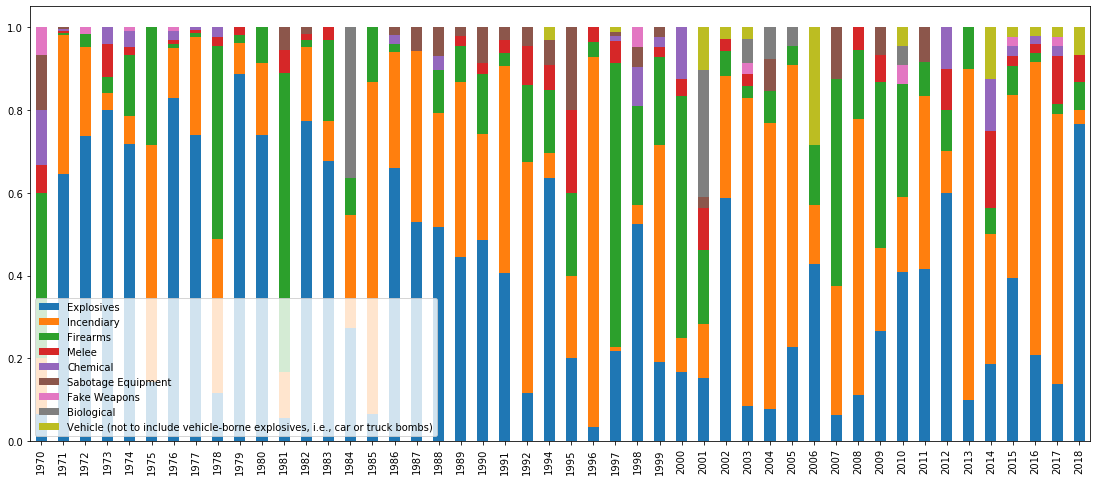

In [214]:
weapons_df.plot(kind='bar', stacked=True, legend=True,figsize=(19,8))
plt.show()

### Western Europe

In [0]:
df = terror_df[terror_df.region_txt.isin(['Western Europe'])]

In [0]:
dict_weapons = {}
for year, group in df.groupby('iyear'):
    dict_weapons[year] = {}
    for txt in ['weaptype1_txt','weaptype2_txt','weaptype3_txt']:
      weapons = group[txt].value_counts().to_dict()
      for weapon in weapons.keys():
        if weapon not in ['Unknown','Other'] and weapon in dict_weapons:
          dict_weapons[year][weapon] += weapons[weapon]
        elif weapon not in ['Unknown','Other']:
          dict_weapons[year][weapon] = weapons[weapon]

In [187]:
for k in dict_weapons.keys():
  dict_weapons[k] = normalize(dict_weapons[k])

weapons_df = pd.DataFrame(dict_weapons).transpose()
weapons_df.fillna(0,inplace=True)
weapons_df.head()

,Firearms,Explosives,Incendiary,Chemical,Melee,Radiological,Biological,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",Fake Weapons,Sabotage Equipment
1970,0.285714,0.428571,0.142857,0.142857,0.000000,0.000000,0.0,0.0,0.0,0.0
1971,0.111111,0.555556,0.333333,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1972,0.027273,0.936364,0.027273,0.000000,0.009091,0.000000,0.0,0.0,0.0,0.0
1973,0.357143,0.357143,0.071429,0.142857,0.071429,0.000000,0.0,0.0,0.0,0.0
1974,0.333333,0.166667,0.166667,0.000000,0.250000,0.083333,0.0,0.0,0.0,0.0


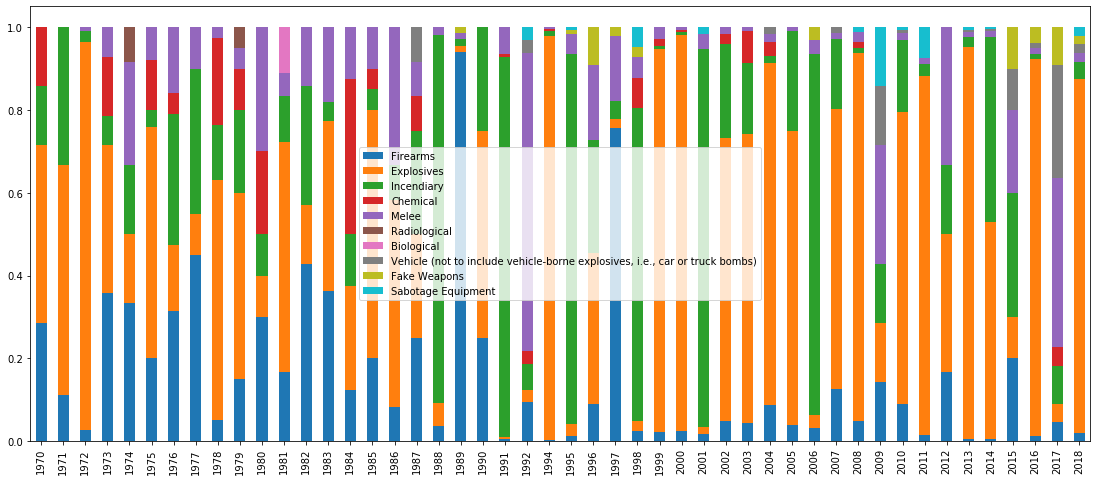

In [188]:
weapons_df.plot(kind='bar', stacked=True, legend=True,figsize=(19,8))
plt.show()

### South America

In [0]:
df = terror_df[terror_df.region_txt.isin(['South America'])]

In [0]:
dict_weapons = {}
for year, group in df.groupby('iyear'):
    dict_weapons[year] = {}
    for txt in ['weaptype1_txt','weaptype2_txt','weaptype3_txt']:
      weapons = group[txt].value_counts().to_dict()
      for weapon in weapons.keys():
        if weapon not in ['Unknown','Other'] and weapon in dict_weapons:
          dict_weapons[year][weapon] += weapons[weapon]
        elif weapon not in ['Unknown','Other']:
          dict_weapons[year][weapon] = weapons[weapon]

In [191]:
for k in dict_weapons.keys():
  dict_weapons[k] = normalize(dict_weapons[k])

weapons_df = pd.DataFrame(dict_weapons).transpose()
weapons_df.fillna(0,inplace=True)
weapons_df.head()

,Firearms,Explosives,Incendiary,Sabotage Equipment,Chemical,Melee,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",Fake Weapons,Biological
1970,0.235294,0.705882,0.058824,0.0,0.0,0.0,0.0,0.0,0.0
1971,0.200000,0.600000,0.200000,0.0,0.0,0.0,0.0,0.0,0.0
1972,0.192308,0.807692,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1973,0.037037,0.888889,0.074074,0.0,0.0,0.0,0.0,0.0,0.0
1974,0.125000,0.250000,0.625000,0.0,0.0,0.0,0.0,0.0,0.0


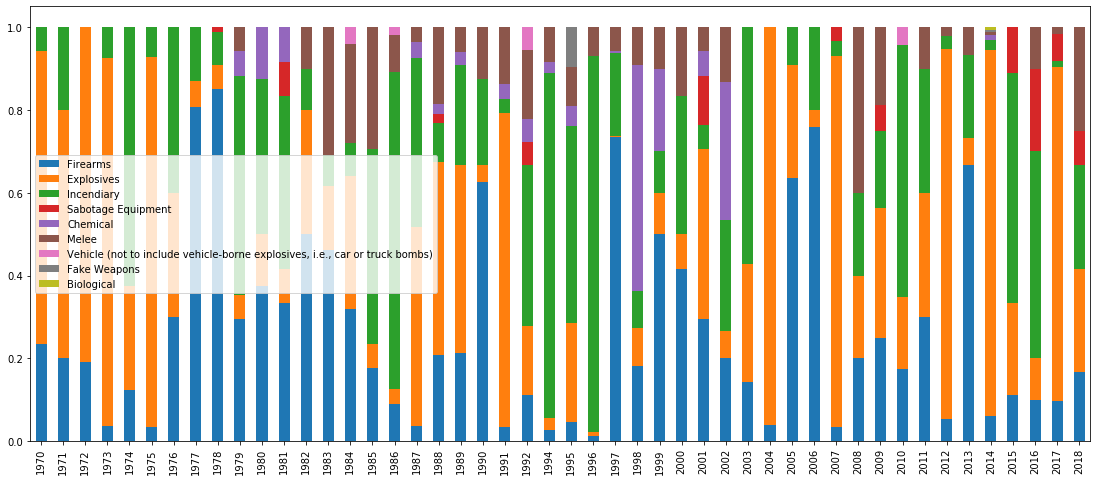

In [192]:
weapons_df.plot(kind='bar', stacked=True, legend=True,figsize=(19,8))
plt.show()

### South Asia

In [0]:
df = terror_df[terror_df.region_txt.isin(['South Asia'])]

In [0]:
dict_weapons = {}
for year, group in df.groupby('iyear'):
    dict_weapons[year] = {}
    for txt in ['weaptype1_txt','weaptype2_txt','weaptype3_txt']:
      weapons = group[txt].value_counts().to_dict()
      for weapon in weapons.keys():
        if weapon not in ['Unknown','Other'] and weapon in dict_weapons:
          dict_weapons[year][weapon] += weapons[weapon]
        elif weapon not in ['Unknown','Other']:
          dict_weapons[year][weapon] = weapons[weapon]

In [201]:
for k in dict_weapons.keys():
  dict_weapons[k] = normalize(dict_weapons[k])

weapons_df = pd.DataFrame(dict_weapons).transpose()
weapons_df.fillna(0,inplace=True)
weapons_df.head()

,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",Explosives,Firearms,Incendiary,Melee,Sabotage Equipment,Chemical,Fake Weapons,Biological
1970,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1972,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1974,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0
1975,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0


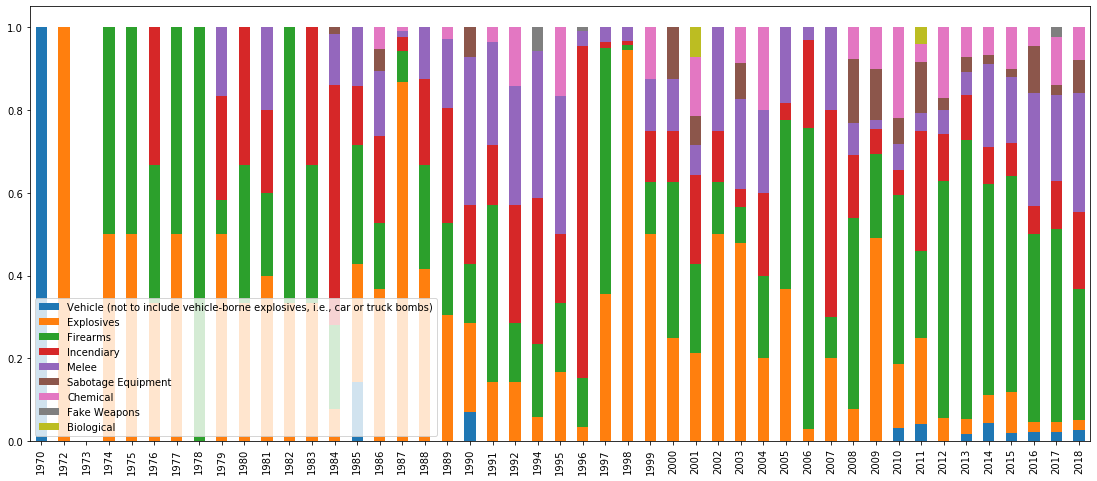

In [202]:
weapons_df.plot(kind='bar', stacked=True, legend=True,figsize=(19,8))
plt.show()

### Middle East & North Africa

In [0]:
df = terror_df[terror_df.region_txt.isin(['Middle East & North Africa'])]

In [0]:
dict_weapons = {}
for year, group in df.groupby('iyear'):
    dict_weapons[year] = {}
    for txt in ['weaptype1_txt','weaptype2_txt','weaptype3_txt']:
      weapons = group[txt].value_counts().to_dict()
      for weapon in weapons.keys():
        if weapon not in ['Unknown','Other'] and weapon in dict_weapons:
          dict_weapons[year][weapon] += weapons[weapon]
        elif weapon not in ['Unknown','Other']:
          dict_weapons[year][weapon] = weapons[weapon]

In [205]:
for k in dict_weapons.keys():
  dict_weapons[k] = normalize(dict_weapons[k])

weapons_df = pd.DataFrame(dict_weapons).transpose()
weapons_df.fillna(0,inplace=True)
weapons_df.head()

,Explosives,Firearms,Incendiary,Melee,Chemical,Fake Weapons,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",Sabotage Equipment,Biological
1970,0.833333,0.083333,0.083333,0.0,0.0,0.0,0.0,0.0,0.0
1971,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0
1972,0.250000,0.750000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1973,0.600000,0.200000,0.200000,0.0,0.0,0.0,0.0,0.0,0.0
1974,0.200000,0.666667,0.133333,0.0,0.0,0.0,0.0,0.0,0.0


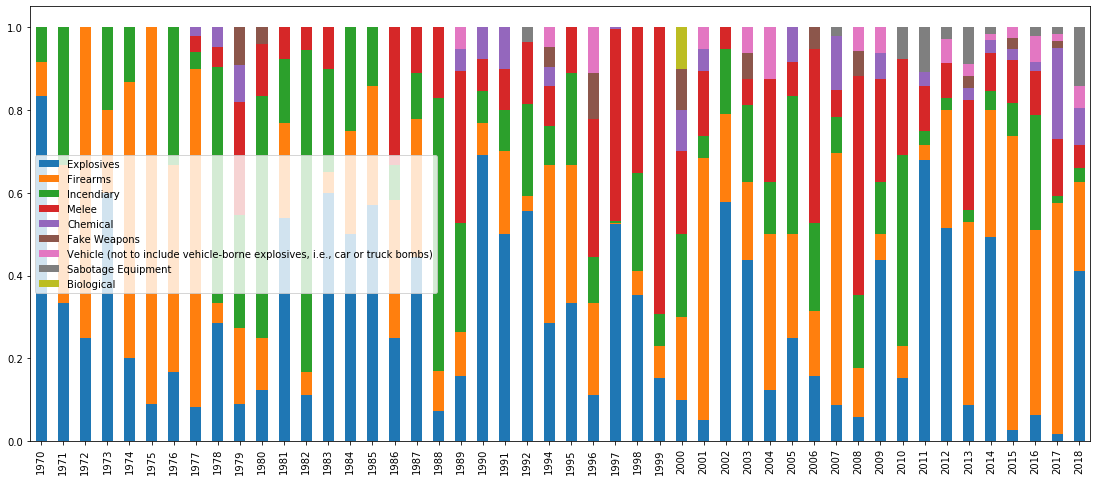

In [206]:
weapons_df.plot(kind='bar', stacked=True, legend=True,figsize=(19,8))
plt.show()

## Type of attack

### North America

In [0]:
df = terror_df[terror_df.region_txt.isin(['North America'])]

In [0]:
dict_attack = {}
for year, group in df.groupby('iyear'):
    dict_attack[year] = {}
    for txt in ['attacktype1_txt','attacktype2_txt','attacktype3_txt']:
      attacks = group[txt].value_counts().to_dict()
      for attack in attacks.keys():
          if attack not in ['Unknown','Other'] and attack in dict_weapons:
              dict_attack[year][attack] += attacks[attack]
          elif attack not in ['Unknown','Other']:
              dict_attack[year][attack] = attacks[attack]

In [209]:
for k in dict_attack.keys():
  dict_attack[k] = normalize(dict_attack[k])

attacks_df = pd.DataFrame(dict_attack).transpose()
attacks_df.fillna(0,inplace=True)
attacks_df.head()

,Bombing/Explosion,Hostage Taking (Kidnapping),Armed Assault,Hostage Taking (Barricade Incident),Facility/Infrastructure Attack,Hijacking,Assassination,Unarmed Assault
1970,0.500000,0.150000,0.150000,0.100000,0.050000,0.050000,0.000000,0.0
1971,0.657895,0.078947,0.157895,0.000000,0.026316,0.052632,0.026316,0.0
1972,0.469388,0.000000,0.020408,0.020408,0.000000,0.102041,0.387755,0.0
1973,0.777778,0.000000,0.111111,0.055556,0.000000,0.055556,0.000000,0.0
1974,0.657895,0.052632,0.078947,0.052632,0.026316,0.052632,0.078947,0.0


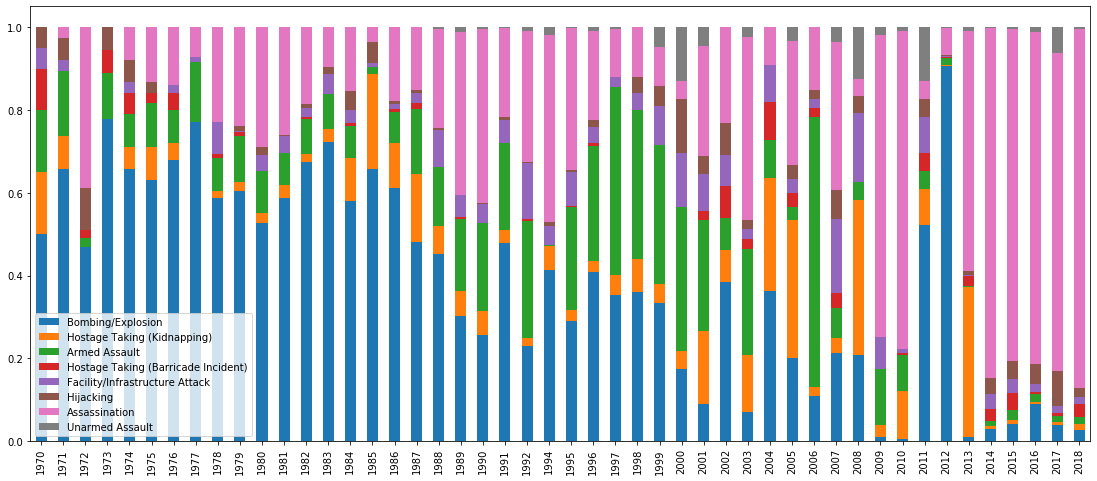

In [210]:
attacks_df.plot(kind='bar', stacked=True, legend=True,figsize=(19,8))
plt.show()

### South and Center America

In [0]:
df = terror_df[terror_df.region_txt.isin(['Central America & Caribbean','South America'])]

In [0]:
dict_attack = {}
for year, group in df.groupby('iyear'):
    dict_attack[year] = {}
    for txt in ['attacktype1_txt','attacktype2_txt','attacktype3_txt']:
      attacks = group[txt].value_counts().to_dict()
      for attack in attacks.keys():
          if attack not in ['Unknown','Other'] and attack in dict_weapons:
              dict_attack[year][attack] += attacks[attack]
          elif attack not in ['Unknown','Other']:
              dict_attack[year][attack] = attacks[attack]

In [167]:
for k in dict_attack.keys():
  dict_attack[k] = normalize(dict_attack[k])

attacks_df = pd.DataFrame(dict_attack).transpose()
attacks_df.fillna(0,inplace=True)
attacks_df.head()

,Hostage Taking (Kidnapping),Facility/Infrastructure Attack,Bombing/Explosion,Assassination,Armed Assault,Hostage Taking (Barricade Incident),Hijacking,Unarmed Assault
1970,0.338235,0.161765,0.161765,0.161765,0.147059,0.014706,0.014706,0.000000
1971,0.357143,0.071429,0.107143,0.107143,0.357143,0.000000,0.000000,0.000000
1972,0.147059,0.000000,0.323529,0.470588,0.058824,0.000000,0.000000,0.000000
1973,0.341772,0.063291,0.265823,0.164557,0.101266,0.012658,0.037975,0.012658
1974,0.215909,0.022727,0.568182,0.125000,0.045455,0.022727,0.000000,0.000000


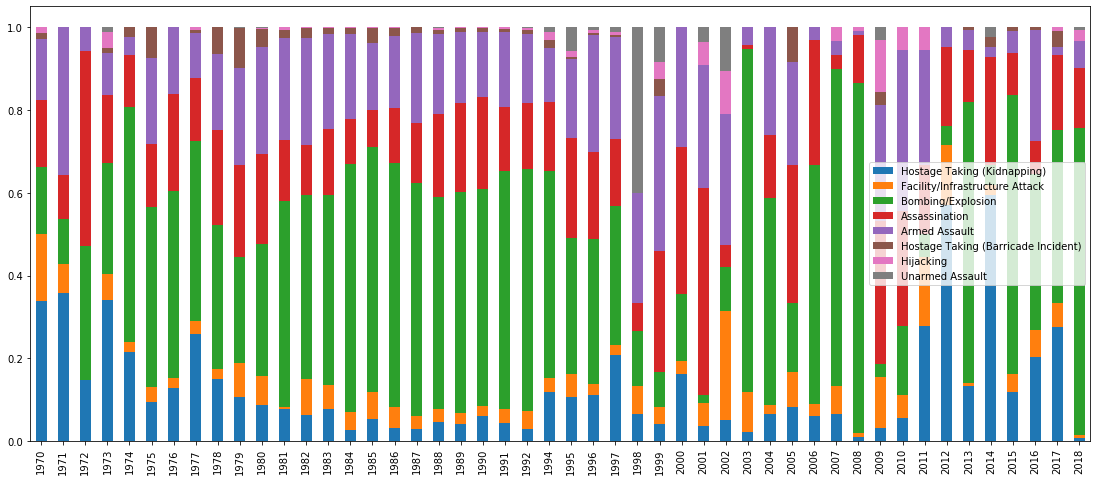

In [168]:
attacks_df.plot(kind='bar', stacked=True, legend=True,figsize=(19,8))
plt.show()

### Africa

In [0]:
dict_attack = {}
for year, group in afr_terror_df.groupby('iyear'):
    dict_attack[year] = {}
    for txt in ['attacktype1_txt','attacktype2_txt','attacktype3_txt']:
      attacks = group.attacktype1_txt.value_counts().to_dict()
      for attack in attacks.keys():
          if attack not in ['Unknown','Other'] and attack in dict_weapons:
              dict_attack[year][attack] += attacks[attack]
          elif attack not in ['Unknown','Other']:
              dict_attack[year][attack] = attacks[attack]

In [137]:
for k in dict_attack.keys():
  dict_attack[k] = normalize(dict_attack[k])

attacks_df = pd.DataFrame(dict_attack).transpose()
attacks_df.fillna(0,inplace=True)
attacks_df.head()

,Bombing/Explosion,Hostage Taking (Kidnapping),Armed Assault,Hostage Taking (Barricade Incident),Hijacking,Facility/Infrastructure Attack,Assassination,Unarmed Assault
1970,0.454545,0.227273,0.136364,0.090909,0.045455,0.045455,0.000000,0.0
1971,0.625000,0.100000,0.150000,0.000000,0.075000,0.025000,0.025000,0.0
1972,0.433962,0.000000,0.018868,0.018868,0.094340,0.000000,0.433962,0.0
1973,0.636364,0.090909,0.090909,0.045455,0.045455,0.000000,0.090909,0.0
1974,0.622222,0.111111,0.066667,0.044444,0.044444,0.022222,0.088889,0.0


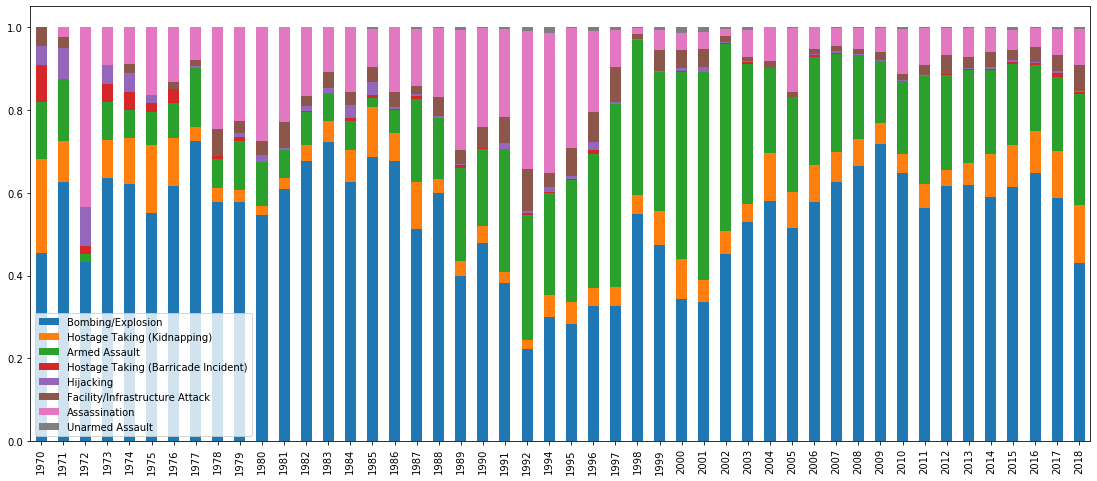

In [138]:
attacks_df.plot(kind='bar', stacked=True, legend=True,figsize=(19,8))
plt.show()

### Western Europe

In [0]:
dict_attack = {}
for year, group in west_terror_df.groupby('iyear'):
    dict_attack[year] = {}
    for txt in ['attacktype1_txt','attacktype2_txt','attacktype3_txt']:
      attacks = group.attacktype1_txt.value_counts().to_dict()
      for attack in attacks.keys():
          if attack not in ['Unknown','Other'] and attack in dict_weapons:
              dict_attack[year][attack] += attacks[attack]
          elif attack not in ['Unknown','Other']:
              dict_attack[year][attack] = attacks[attack]

In [140]:
for k in dict_attack.keys():
  dict_attack[k] = normalize(dict_attack[k])

attacks_df = pd.DataFrame(dict_attack).transpose()
attacks_df.fillna(0,inplace=True)
attacks_df.head()

,Armed Assault,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Kidnapping),Unarmed Assault,Assassination,Hostage Taking (Barricade Incident)
1970,0.312500,0.312500,0.166667,0.125000,0.062500,0.020833,0.000000,0.000000
1971,0.048780,0.536585,0.073171,0.012195,0.036585,0.000000,0.292683,0.000000
1972,0.065574,0.311475,0.008197,0.012295,0.024590,0.000000,0.577869,0.000000
1973,0.100000,0.309524,0.095238,0.019048,0.014286,0.009524,0.438095,0.014286
1974,0.074349,0.397770,0.092937,0.000000,0.014870,0.007435,0.408922,0.003717


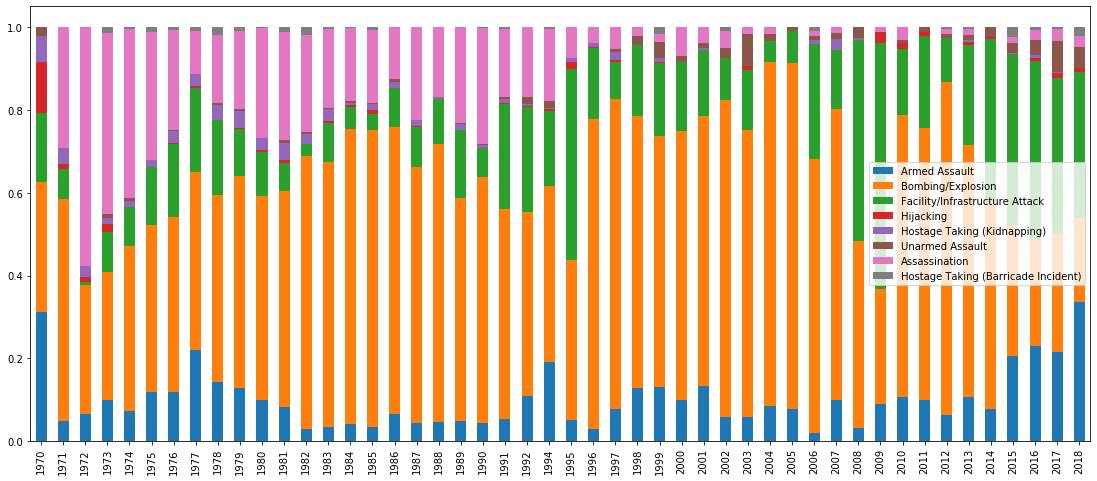

In [141]:
attacks_df.plot(kind='bar', stacked=True, legend=True,figsize=(19,8))
plt.show()

## Terrorist groups

In [169]:
dict_gname = {}
for year, group in terror_df.groupby('iyear'):
    dict_gname[year] = {}
    for txt in ['gname']:
      gnames = group[txt].value_counts().to_dict()
      del gnames['Unknown']
      dict_gname[year] = max(gnames, key=gnames.get)

dict_gname

{1970: 'Left-Wing Militants',
 1971: 'Left-Wing Militants',
 1972: 'Black September',
 1973: 'Irish Republican Army (IRA)',
 1974: 'Irish Republican Army (IRA)',
 1975: 'Irish Republican Army (IRA)',
 1976: 'Irish Republican Army (IRA)',
 1977: 'Irish Republican Army (IRA)',
 1978: 'Basque Fatherland and Freedom (ETA)',
 1979: 'Irish Republican Army (IRA)',
 1980: 'Farabundo Marti National Liberation Front (FMLN)',
 1981: 'Farabundo Marti National Liberation Front (FMLN)',
 1982: 'Shining Path (SL)',
 1983: 'Shining Path (SL)',
 1984: 'Shining Path (SL)',
 1985: 'Farabundo Marti National Liberation Front (FMLN)',
 1986: 'Shining Path (SL)',
 1987: 'Shining Path (SL)',
 1988: 'Farabundo Marti National Liberation Front (FMLN)',
 1989: 'Shining Path (SL)',
 1990: 'Shining Path (SL)',
 1991: 'Shining Path (SL)',
 1992: "Kurdistan Workers' Party (PKK)",
 1994: 'Irish Republican Army (IRA)',
 1995: "Kurdistan Workers' Party (PKK)",
 1996: 'Liberation Tigers of Tamil Eelam (LTTE)',
 1997: 'Re

### Africa

In [170]:
dict_attack = {}
for year, group in afr_terror_df.groupby('iyear'):
    dict_gname[year] = {}
    for txt in ['gname']:
      gnames = group[txt].value_counts().to_dict()
      del gnames['Unknown']
      dict_gname[year] = max(gnames, key=gnames.get)

dict_gname

{1970: 'Popular Front for the Liberation of Palestine (PFLP)',
 1971: "Turkish People's Liberation Army",
 1972: 'Black September',
 1973: 'Black September',
 1974: 'Arab Communist Organization',
 1975: 'Mujahedin-e Khalq (MEK)',
 1976: "Turkish People's Liberation Army",
 1977: 'African National Congress (South Africa)',
 1978: 'Palestinians',
 1979: 'Palestinians',
 1980: 'Palestinians',
 1981: 'African National Congress (South Africa)',
 1982: 'Palestinians',
 1983: 'African National Congress (South Africa)',
 1984: 'African National Congress (South Africa)',
 1985: 'African National Congress (South Africa)',
 1986: 'African National Congress (South Africa)',
 1987: 'African National Congress (South Africa)',
 1988: 'African National Congress (South Africa)',
 1989: 'Palestinians',
 1990: 'National Union for the Total Independence of Angola (UNITA)',
 1991: 'Dev Sol',
 1992: "Kurdistan Workers' Party (PKK)",
 1994: "Al-Gama'at al-Islamiyya (IG)",
 1995: "Al-Gama'at al-Islamiyya (IG)

## Ratio kills/attacks

In [0]:
dict_ratio = {}
for year, group in terror_df.groupby('iyear'):
    nb_kills = group.nkill.sum()
    nb_attacks = len(group)
    ratio = nb_kills/nb_attacks
    dict_ratio[year] = ratio

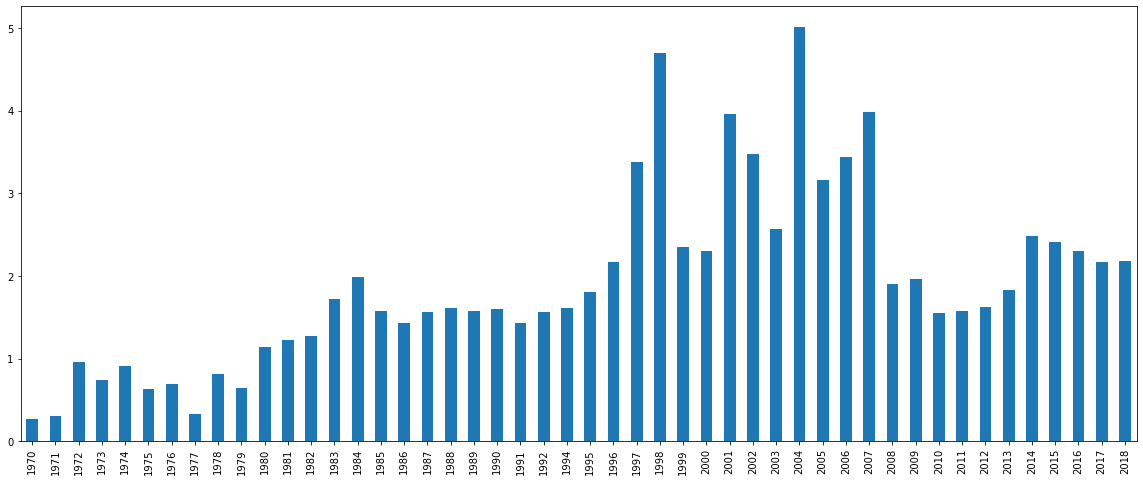

In [0]:
ratio_df = pd.Series(dict_ratio)
ratio_df.plot.bar(figsize=(20,8))
plt.show()

## Target victim

In [0]:
target_victim = terror_df.targtype1_txt.unique().tolist()
del target_victim[target_victim.index('Unknown')]
del target_victim[target_victim.index('Other')]

dict_target = {}
for year, group in terror_df.groupby('iyear'):
    dict_target[year] = {}
    targets = group.targtype1_txt.value_counts().to_dict()
    for target in target_victim:
        if target in targets.keys():
            dict_target[year][target] = targets[target]
        else:
            dict_target[year][target] = 0

In [0]:
target_df = pd.DataFrame(dict_target).transpose()
target_df.head()

,Private Citizens & Property,Government (Diplomatic),Journalists & Media,Police,Utilities,Military,Government (General),Airports & Aircraft,Business,Educational Institution,Violent Political Party,Religious Figures/Institutions,Transportation,Tourists,NGO,Telecommunication,Food or Water Supply,Terrorists/Non-State Militia,Maritime,Abortion Related
1970,56,55,9,81,16,62,80,25,136,62,1,13,2,2,8,7,2,4,0,0
1971,23,35,12,38,12,40,46,10,130,40,2,4,4,3,2,3,0,0,2,0
1972,152,75,5,26,7,10,27,22,75,6,1,0,3,4,5,0,0,5,1,0
1973,125,57,3,29,5,9,22,20,82,5,0,2,2,0,2,0,0,9,3,0
1974,129,58,9,41,5,9,36,20,177,3,0,7,7,0,3,4,0,9,2,0


In [0]:
most_target = target_df.sum().sort_values(ascending=False) > 1000 # We keep only the targets that are the more present
imp_targets = [target for target, imp in most_target.items() if imp]
slice1 = imp_targets[:4]
slice2 = imp_targets[4:8]
slice3 = imp_targets[8:12]
slice4 = imp_targets[12:16]


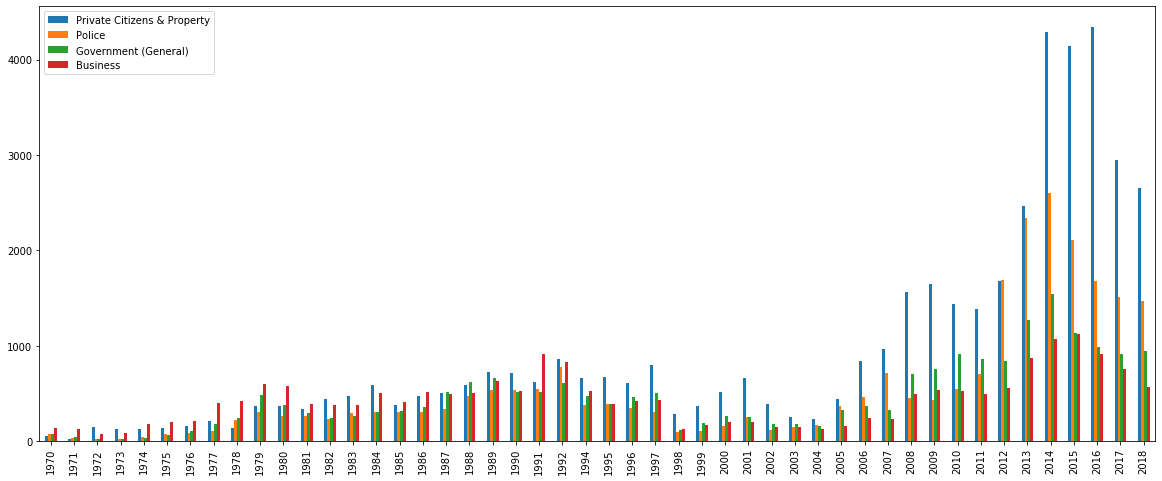

In [0]:
target_df[slice1].plot.bar(figsize=(20,8))
plt.show()

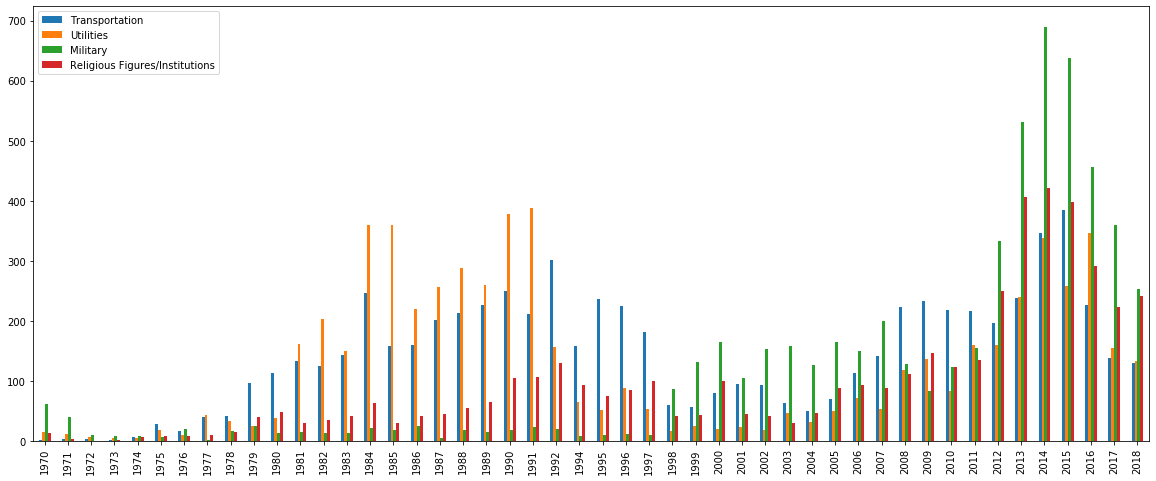

In [0]:
target_df[slice2].plot.bar(figsize=(20,8))
plt.show()

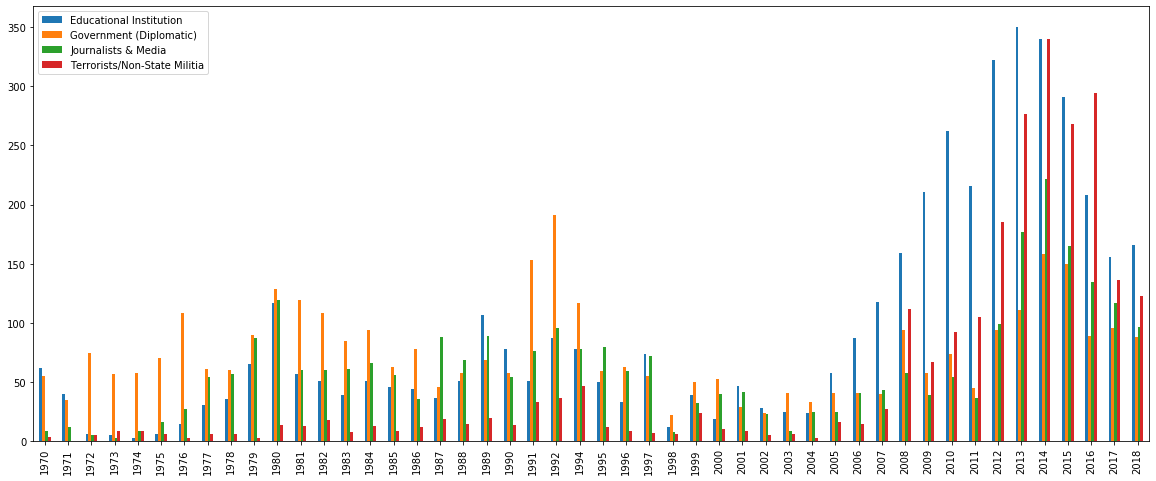

In [0]:
target_df[slice3].plot.bar(figsize=(20,8))
plt.show()

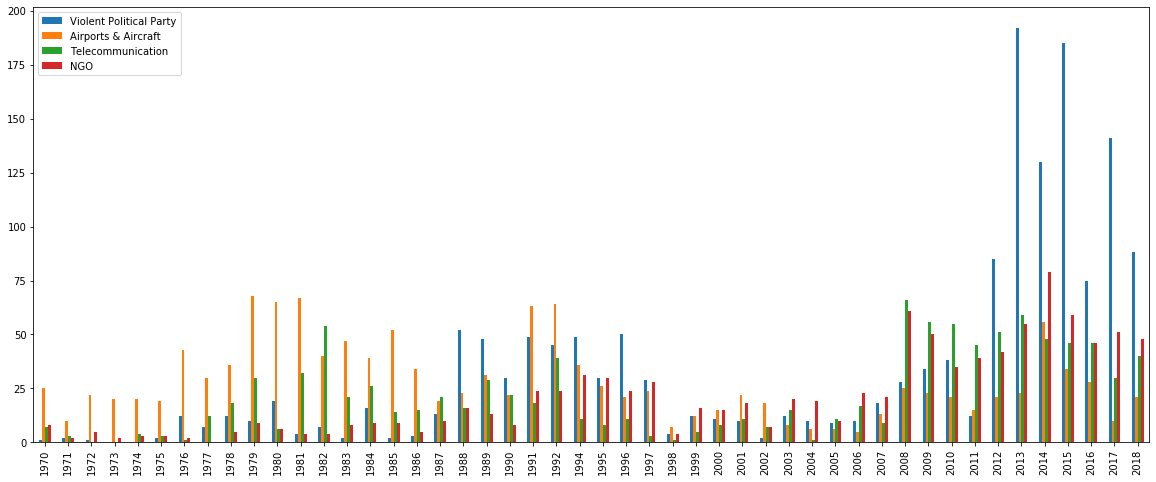

In [0]:
target_df[slice4].plot.bar(figsize=(20,8))
plt.show()

## INTERRESTING TO LOOK AT MOTIVE
This field may also include general information about the political, social, or economic climate at the time of the attack if considered relevant to the motivation underlying the incident

## Damage in USD

In [0]:
dict_ratio_damage = {}
for year, group in terror_df.groupby('iyear'):
    dammage_value = group.propvalue.sum()
    nb_attacks = len(group)
    ratio = dammage_value/nb_attacks
    dict_ratio_damage[year] = ratio

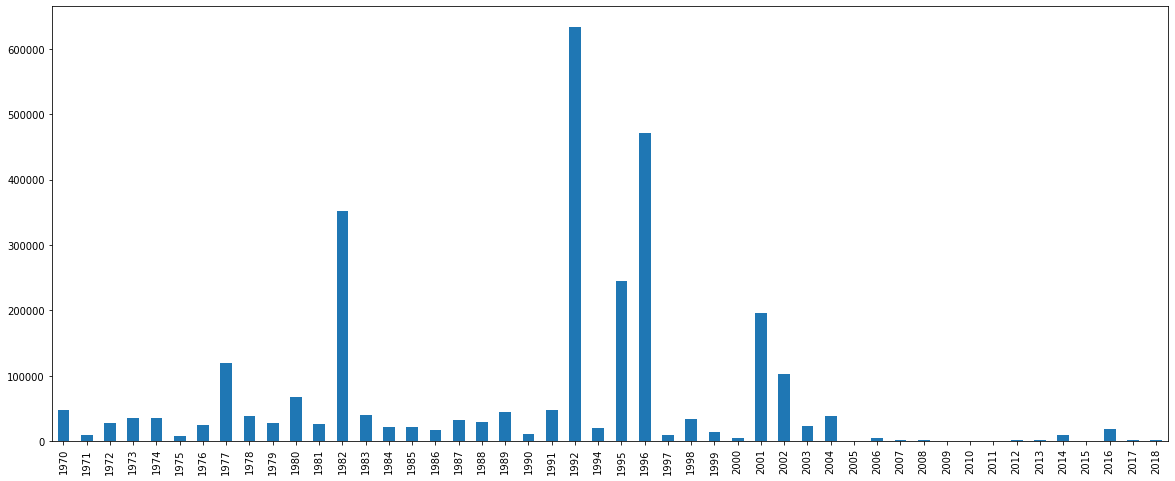

In [0]:
ratio_dam_df = pd.Series(dict_ratio_damage)
ratio_dam_df.plot.bar(figsize=(20,8))
plt.show()